In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets

from collections import Counter

iris = datasets.load_iris()
iris

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# Виды (классы) цветов
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# Рассмотрим что характеризует каждый класс
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

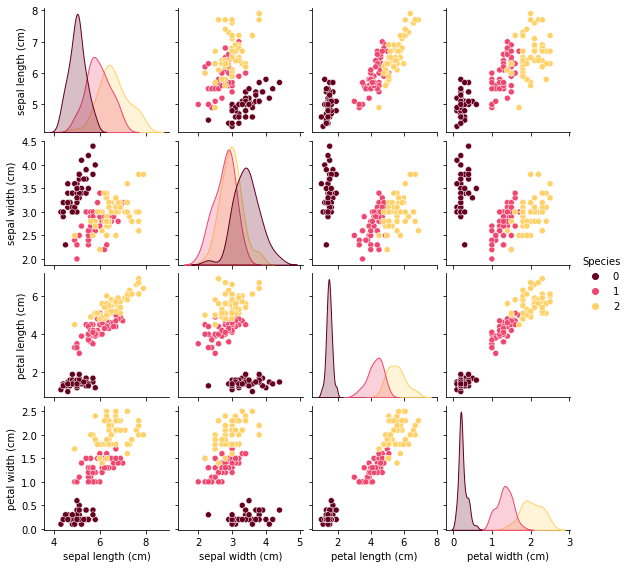

In [ ]:
targets = iris.target
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Species'] = targets

x = iris.get('data')
sns.pairplot(df, hue="Species", height = 2.0, palette=['#650021', '#EF476F', '#FFD166'])
plt.show()

In [ ]:
def normalize(a):
    row_sums = a.sum(axis=1)
    new_matrix = a
    for i, (row, row_sum) in enumerate(zip(a, row_sums)):
        new_matrix[i, :] = row / row_sum
    return new_matrix

<ipython-input-28-7b94d5de5558>:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.data = x


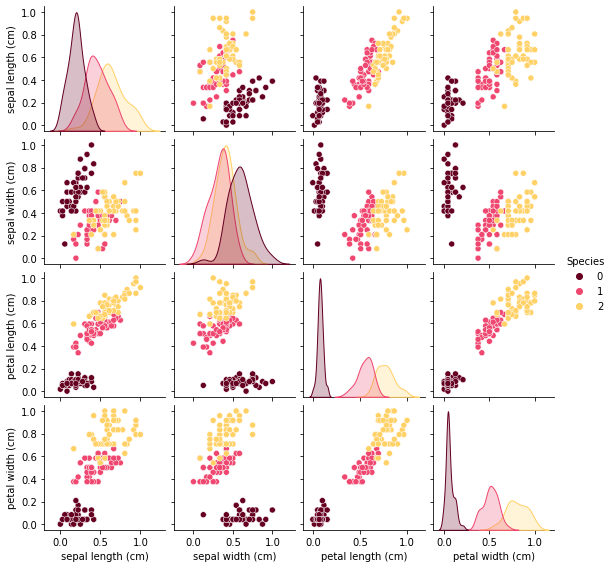

In [ ]:
def normalize_data(dataset):
    num_features = len(dataset)
    for i in range(4):
        column_values = [row[i] for row in dataset]
        column_min = min(column_values)
        column_max = max(column_values)

        for row in dataset:
            row[i] = (row[i] - column_min) / (column_max - column_min)

normalize_data(x)
df.data = x
sns.pairplot(df, hue="Species", height =2.0,palette=['#650021', '#EF476F', '#FFD166'])
plt.show()

In [ ]:
y = iris.get('target')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
def dist (a, b):
    return ((a[0] - b[0])**2 + (a[1] - b[1])**2)**0.5

In [ ]:
def predict(X_train, y_train, x_test, k):
    # создадим список для расстояний и словарь k-значений рядом
    distances = []
    targets = {}

    for i in range(len(X_train)):
        # пройдем по всем точкам и посчитаем расстояние до них от тестовой точки
        distances.append([dist(x_test,X_train[i]), i])

    # отсортируем расстояния
    distances = sorted(distances)
    
    # создадим словарь с k ближайщими значениями
    for i in range(k):
        index = distances[i][1]
        if targets.get(y_train[index]) != None:
            targets[y_train[index]] += 1
        else:
            targets[y_train[index]] = 1
        
    # вернем самую часто встречающаюся метку
    return max(targets,key=targets.get)

In [ ]:
class KNN:
    """
    k-NN классификатор
    Возвращает: предсказания k-NN
    """

    def __init__(self):
        self.X_train = None
        self.y_train = None
        self.k = None
        self.predictions = []
    
    @staticmethod
    def _dist(a, b):
        """
        Расстояние евклида
        Принимает на вход два вектора

        Возвращает: число с плавающей точкой
        """
        return ((a[0] - b[0])**2 + (a[1] - b[1])**2)**0.5
    
    @staticmethod
    def score(y_test, predictions):
        """
        Принимает на вход два массива с данными: тестовый и предсказанный

        Возвращает: число с плавающей точкой
        """
        correct = 0
        for i in range(len(y_test)):
            if y_test[i] == predictions[i]:
                correct += 1
        return correct/len(y_test)
    
    def plot(self, y_test):
        colors = []
        for c in y_test:
            if c == "Iris-setosa":
                colors.append(0)
            elif c == "Iris-versicolor":
                colors.append(1)
            else:
                colors.append(2)
                        
                
        plt.scatter(X_test[:,0], X_test[:,1], c=colors)
        plt.title("Real Data")
        plt.show()
        
        colors = []
        i = 0
        for c in self.predictions:
            if c == "Iris-setosa":
                colors.append(0)
            elif c == "Iris-versicolor":
                colors.append(1)
            else:
                colors.append(2)
            
        plt.scatter(X_test[:,0], X_test[:,1], c=colors)
        plt.title("Predicted")
        plt.show()
        

    def fit(self, X_train, y_train, k):
        """
        Принимает на вход два массива с данными: тренировочный Х и тренировочные лейблы
        и k - количество соседей
        """
        self.X_train = X_train
        self.y_train = y_train
        self.k = k

    def predict(self, X_test):
        """
        Принимает на вход двумерный массив искомых точек

        Возвращает: список предсказаний
        """
        
        for i in range(len(X_test)):
            distances = []
            targets = {}

            for j in range(len(X_train)):
                # пройдем по всем точкам и посчитаем расстояние до них от тестовой точки
                distances.append([self._dist(X_test[i], X_train[j]), j])

            # отсортируем расстояния
            distances = sorted(distances)

            # создадим словарь с k ближайщими значениями
            for j in range(self.k):
                index = distances[j][1]
                if targets.get(y_train[index]) != None:
                    targets[y_train[index]] += 1
                else:
                    targets[y_train[index]] = 1

            # вернем самую часто встречающаюся метку
            self.predictions.append(max(targets, key=targets.get))

        return self.predictions

In [ ]:
metricas = []

for i in range(1, 10):
    knn = KNN()
    knn.fit(X_train, y_train, i)
    pred = knn.predict(X_test)
    metricas.append(knn.score(y_test,pred))
    print("k = " + str(i), ", Score: " + str(knn.score(y_test,pred)))

k = 1 , Score: 0.6333333333333333
k = 2 , Score: 0.6333333333333333
k = 3 , Score: 0.7333333333333333
k = 4 , Score: 0.6666666666666666
k = 5 , Score: 0.7
k = 6 , Score: 0.7
k = 7 , Score: 0.7333333333333333
k = 8 , Score: 0.7333333333333333
k = 9 , Score: 0.7666666666666667


In [ ]:
knn = KNN()
knn.fit(X_train, y_train, 9)

pred = knn.predict(X_test)
print(pred)
print(knn.score(y_test,pred))

[1, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 2, 2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 0, 0]
0.7666666666666667


In [ ]:
norm_x_train = normalize(X_train)
norm_x_test = normalize(X_test)

In [ ]:
import math
def euclidean_distance(x_train, x_test_point):
    distances = []
    # рассчитываю расстояния до каждой точки в наборе обучающих данных
    for row in range(len(x_train)):
        current_train_point = x_train[row]
        current_distance = 0

        for col in range(len(current_train_point)):
            current_distance += (current_train_point[col] - x_test_point[col]) ** 2
        current_distance = np.sqrt(current_distance)
        distances.append(current_distance)

    distances = pd.DataFrame(data=distances, columns=['dist'])
    return distances

def nearest_neighbors(distance_point, k):
    # сортировка расстояний всех точек
    knearests = distance_point.sort_values(by=['dist'], axis=0)

    # беру ближайщих k соседей
    knearests = knearests[:k]
    return knearests


def most_common(k_nearest, y_train):
    # получаю индексы видов соседей c их повторениями
    common_types = Counter(y_train[k_nearest.index])
    # определяю самый популярный вид среди соседей
    prediction = common_types.most_common()[0][0]
    return prediction

In [ ]:
def knn_iris(x_train, y_train, x_test, k):
    prediction = []

    for x_test_point in x_test:
        # получаю все расстояния от точек до точек
        distance_point = euclidean_distance(x_train, x_test_point)
        # определяю ближайшие точки
        nearest_point = nearest_neighbors(distance_point, k)
        # ближайшие популярные точки
        pred_point = most_common(nearest_point, y_train)
        prediction.append(pred_point)

    return prediction


In [ ]:
# функция для подсчета точности вычислений
def calculate_accuracy(y_test, y_pred):
    correct_count = 0
    for i in range(len(y_test)):
        if y_test[i] == y_pred[i]:
            correct_count = correct_count + 1
    accuracy = correct_count / len(y_test)
    return accuracy

In [ ]:
new_row = [[0.2, 0.7,	0.4, 0.3]]
test = pd.DataFrame(new_row)
test = np.asarray(test)
test_array = normalize(test)


flower_type = {0.0: 'Setosa', 1.0: 'Versicolor', 2.0: 'Virginica'}
k = 9
predictions = knn_iris(norm_x_train, y_train, test_array, k)
for i in predictions:
    print(flower_type[i])

Setosa
